In [1]:
import random
import numpy as np 
from scipy.stats import multivariate_normal as mvn
from matplotlib import pyplot as plt
#random.seed(23)
random.seed()

/home/houwaart/conda/lib/python2.7/site-packages/setuptools-20.3-py2.7.egg/pkg_resources/__init__.py:1248: UserWarning: /home/houwaart/.python-eggs is writable by group/others and vulnerable to attack when used with get_resource_filename. Consider a more secure location (set with .set_extraction_path or the PYTHON_EGG_CACHE environment variable).


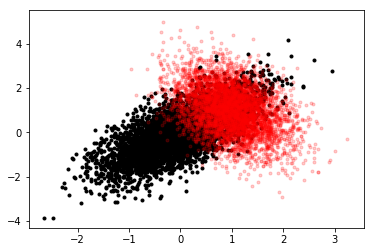

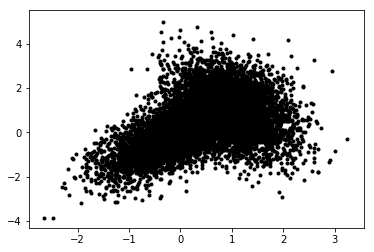

In [2]:
rm_a = [0,0]
rcov_a = [[0.5,0.5],[0.5,1]]

rm_b = [1,1]
rcov_b = [[0.3,-0.2],[-0.2,1]]

nr_data_points = 5000

A=np.random.multivariate_normal(rm_a, rcov_a, nr_data_points)
xa = [A[i][0] for i in range(len(A))]
ya = [A[i][1] for i in range(len(A))]
B=np.random.multivariate_normal(rm_b, rcov_b, nr_data_points)
xb = [B[i][0] for i in range(len(A))]
yb = [B[i][1] for i in range(len(A))]

data = np.concatenate((A,B))

plt.scatter(xa,ya,color='k',marker='.')
plt.scatter(xb,yb,color='r',marker='.',alpha=0.2)
plt.show()


plt.scatter(xa,ya,color='k',marker='.')
plt.scatter(xb,yb,color='k',marker='.')
plt.show()


In [3]:
def e_step (theta,dat):
    ez = {}
    amv = mvn(theta['a'][0],theta['a'][1])
    bmv = mvn(theta['b'][0],theta['b'][1])
    mv = {'a':amv, 'b':bmv}
    for i in ['a','b']:
        ez[i] = []
        for j in range(0,len(dat)):
            ez[i].append(mv[i].pdf(dat[j])/(amv.pdf(dat[j])+bmv.pdf(dat[j])))
    return ez


In [4]:
def m_step(ez,dat):
    z = {'a':0, 'b':0}
    q00 = {'a':0, 'b':0}
    q10 = {'a':0, 'b':0}
    q01 = {'a':0, 'b':0}
    q11 = {'a':0, 'b':0}
    new_th = {'a':0, 'b':0}
    n={}
    n['a'] = 0
    n['b'] = 0
    for i in ['a','b']:
        for j in range(0,len(dat)):
            z[i] += ez[i][j]*dat[j]
    
            n[i] += ez[i][j]
            #print i +': ' + str(th[i])
        new_th[i] = z[i]/n[i]
    for i in ['a','b']:
        for j in range(0,len(dat)):
            q00[i] += ez[i][j]*((dat[j][0] - new_th[i][0])*(dat[j][0] - new_th[i][0]))
            q01[i] += ez[i][j]*((dat[j][0] - new_th[i][0])*(dat[j][1] - new_th[i][1]))
            q10[i] += ez[i][j]*((dat[j][1] - new_th[i][1])*(dat[j][0] - new_th[i][0]))
            q11[i] += ez[i][j]*((dat[j][1] - new_th[i][1])*(dat[j][1] - new_th[i][1]))
    
            #n[i] += ez[i][j]
            #print i +': ' + str(th[i])
        
    return {'a': [new_th['a'],[[q00['a']/n['a'],q10['a']/n['a']],[q01['a']/n['a'],q11['a']/n['a']]]],'b':[new_th['b'],[[q00['b']/n['b'],q10['b']/n['b']],[q01['b']/n['b'],q11['b']/n['b']]]]}

In [5]:
def plotCurrentSol(theta,k):
    x, y = np.mgrid[-5:5:.01, -5:6:.01]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x; pos[:, :, 1] = y
    plt.scatter(xa,ya,color='k',marker='.')
    plt.scatter(xb,yb,color='r',marker='.',alpha=0.2)

    amv = mvn(theta['a'][0],theta['a'][1])
    bmv = mvn(theta['b'][0],theta['b'][1])


    levels = np.arange(0.01,0.61,0.1)
    plt.contour(x,y,amv.pdf(pos),levels)
    plt.contour(x,y,bmv.pdf(pos),levels)
    
    plt.text(-4, 4, r'iteration: ' + str(k), fontsize=15)

    plt.scatter(theta['a'][0][0],theta['a'][0][1],color='b',marker='x')
    plt.scatter(theta['b'][0][0],theta['b'][0][1],color='b',marker='+')

    plt.show()

/home/houwaart/conda/lib/python2.7/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/houwaart/conda/lib/python2.7/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


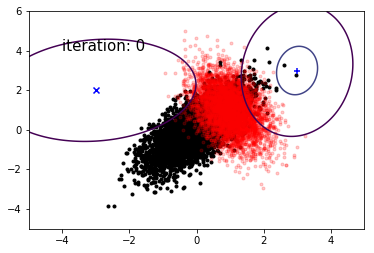

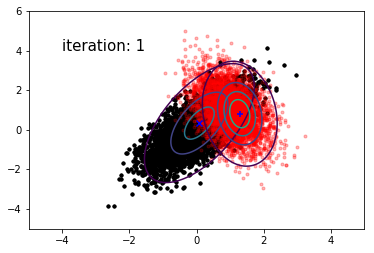

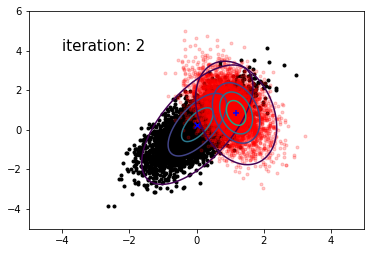

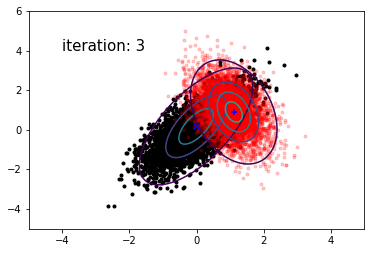

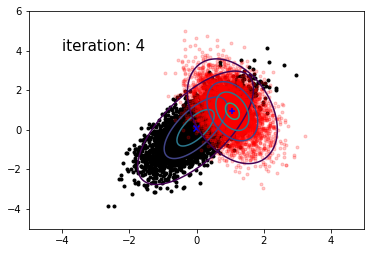

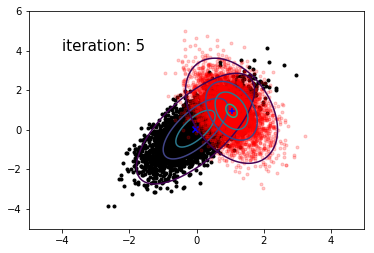

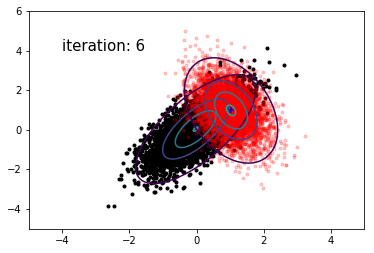

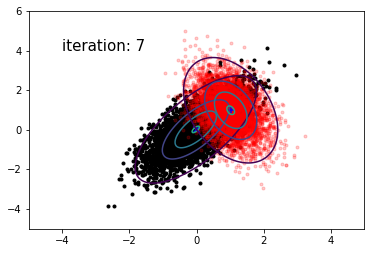

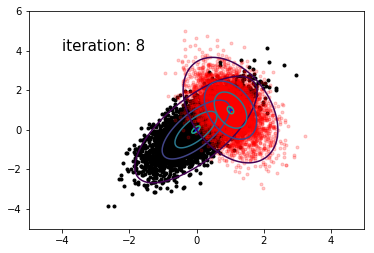

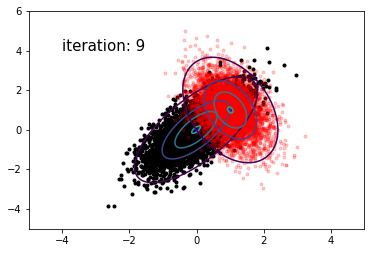

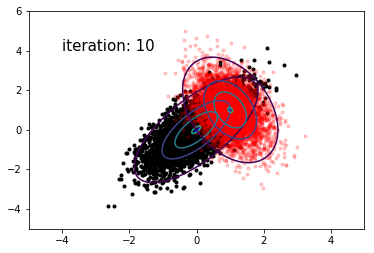

{'a': [array([-0.01122689,  0.00587949]), [[0.49186192163278114, 0.50183018224415055], [0.50183018224415055, 1.0296159779036202]]], 'b': [array([ 1.00665533,  1.00827042]), [[0.29356506407226229, -0.20909869441123657], [-0.20909869441123657, 1.0315268641746869]]]}
real mean of a: [0, 0]
real covariance of a: [[0.5, 0.5], [0.5, 1]]
real mean of b: [1, 1]
real covariance of b: [[0.3, -0.2], [-0.2, 1]]


In [6]:
ct = {'a':[[-3,2],[[2,0.2],[0.2,1.5]]],'b':[[3,3],[[0.5,0.1],[0.1,2]]]}
plotCurrentSol(ct,0)
plt.scatter(xa,ya,color='k',marker='.')
plt.scatter(xb,yb,color='r',marker='.',alpha=0.1)

for k in range(1,11):
    exz = e_step(ct,data)
    ct = m_step(exz,data)
    plotCurrentSol(ct,k)

print ct
print "real mean of a: "+ str(rm_a)
print "real covariance of a: "+ str(rcov_a)
print "real mean of b: "+ str(rm_b)
print "real covariance of b: "+ str(rcov_b)


